# Stochastic Reduce Order Model Example 2

- Author: Mohit S. Chauhan 
- Date: June 4, 2018

In this example, Stratified sampling is used to generate samples from Gamma distribution and weights are defined using Stochastic Reduce Order Model (SROM). This example illustrate how to define same weights for each sample of a random variable.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the STS and SROM class from UQpy.

In [1]:
from UQpy.Surrogates import SROM
from UQpy.SampleMethods import STS
from UQpy.Distributions import Gamma
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

Create a distribution object for Gamma distribution with shape, shift and scale parameters as 2, 1 and 3.

In [2]:
marginals = [Gamma(a=2., loc=1., scale=3.), Gamma(a=2., loc=1., scale=3.)]

Using UQpy STS class to generate samples for two random variables having Gamma distribution.

In [3]:
x = STS(dist_object=marginals, sts_design=[4, 4])

UQpy: Successful execution of STS design..


Run SROM using the defined Gamma distribution. Here we use the following parameters.

- Gamma distribution with shape, shift and scale parameters as 2, 1 and 3.
- First and second order moments about origin are 6 and 54.
- Notice that pdf_target references the Gamma function directly and does not designate it as a string.
- Samples are uncorrelated, i.e. also default value of correlation.

In [4]:
y1 = SROM(samples=x.samples, target_dist_object=marginals, moments=[[6., 6.], [54., 54.]], properties=[True, True, True, False])

In this case, sample_weights are generated using default values of weights_distribution, weights_moments and weights_correlation. Default values are:

In [5]:
print('weights_distribution', '\n', y1.weights_distribution, '\n', 'weights_moments', '\n', y1.weights_moments, '\n', 
      'weights_correlation', '\n', y1.weights_correlation)

weights_distribution 
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]] 
 weights_moments 
 [[0.02777778 0.02777778]
 [0.00034294 0.00034294]] 
 weights_correlation 
 [[1. 1.]
 [1. 1.]]


In [6]:
y2 = SROM(samples=x.samples, target_dist_object=marginals, moments=[[6., 6.], [54., 54.]], properties=[True, True, True, False], 
          weights_distribution=[[0.4, 0.5]], weights_moments=[[0.2, 0.7]], 
          weights_correlation=[[0.3, 0.4], [0.4, 0.6]])

In second case, weights_distribution is modified by SROM class. First, it defines an array of size 2×16 with all elements equal to 1 and then multiply first column by 0.4 and second column by 0.5 . Similarly, weights_moments and weights_correlation are modified.

In [7]:
print('weights_distribution', '\n', y2.weights_distribution, '\n', 'weights_moments', '\n', y2.weights_moments, '\n', 
      'weights_correlation', '\n', y2.weights_correlation)

weights_distribution 
 [[0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]
 [0.4 0.5]] 
 weights_moments 
 [[0.2 0.7]
 [0.2 0.7]] 
 weights_correlation 
 [[0.3 0.4]
 [0.4 0.6]]


Plot below shows the comparison of samples weights generated using two different weights with the actual CDF of gamma distribution.

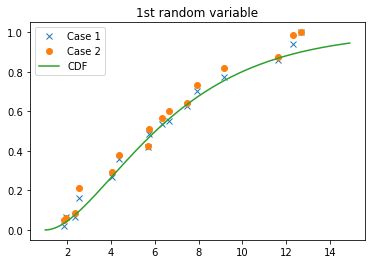

In [8]:
c1 = np.concatenate((y1.samples, y1.sample_weights.reshape(y1.sample_weights.shape[0], 1)), axis=1)
d1 = c1[c1[:, 0].argsort()]
c2 = np.concatenate((y2.samples, y2.sample_weights.reshape(y2.sample_weights.shape[0], 1)), axis=1)
d2 = c2[c2[:, 0].argsort()]
plt.plot(d1[:, 0], np.cumsum(d1[:, 2], axis=0), 'x')
plt.plot(d2[:, 0], np.cumsum(d2[:, 2], axis=0), 'o')
plt.plot(np.arange(1,15,0.1), stats.gamma.cdf(np.arange(1,15,0.1), 2, loc=1, scale=3))
plt.legend(['Case 1','Case 2','CDF'])
plt.title('1st random variable')
plt.show()

A note on the weights corresponding to distribution, moments and correlation of random variables:

- For this illustration, default weights_moments are square of reciprocal of moments. Thus, moments should be of 'float list' type.